<a href="https://colab.research.google.com/github/manvisharma276/CV/blob/main/People_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Engagement dataset.csv to Engagement dataset.csv


In [3]:
df = pd.read_csv('Engagement dataset.csv')

<ipython-input-3-4f50f37b6f52>:1: DtypeWarning: Columns (165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Engagement dataset.csv')


In [13]:
print("Summary Statistics for Numerical Features:")
print(df.describe(include='number'))

print("\nFrequency Distribution of Categorical Features:")
for col in df.select_dtypes(include='object'):
  print(df[col].value_counts())



print("Descriptive Analysis - Initial Exploration Complete!")

Summary Statistics for Numerical Features:
            Sr..No  Employee ID          Age       Gender   Experience  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2500.500000  1144.499000    28.955000     1.407800     6.829000   
std    1443.520003   707.971982     6.307815     0.491475     6.325865   
min       1.000000     1.000000    22.000000     1.000000     1.000000   
25%    1250.750000   508.000000    25.000000     1.000000     3.000000   
50%    2500.500000  1134.000000    27.000000     1.000000     5.000000   
75%    3750.250000  1761.000000    31.000000     2.000000     8.000000   
max    5000.000000  2340.000000    59.000000     2.000000    37.000000   

       MarritalStatus  Qualifications    Attrition  Function     Perf.Cat  \
count     5000.000000     5000.000000  5000.000000    5000.0  5000.000000   
mean         1.602000       25.219200     1.167200       1.0     3.029800   
std          0.489534        4.962628     0.373192       0.

<Figure size 1000x200 with 0 Axes>

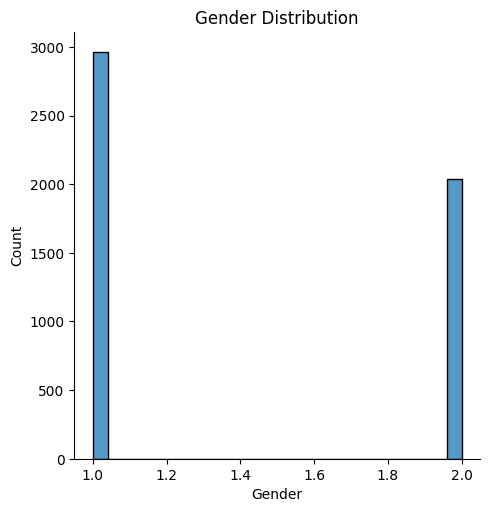

In [14]:
plt.figure(figsize=(10, 2))
sns.displot(df['Gender'], bins=25, kde=False)
plt.title('Gender Distribution')
plt.show()


<Figure size 1000x500 with 0 Axes>

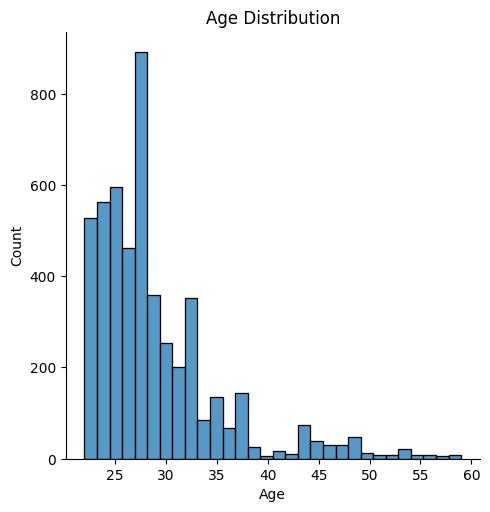

In [15]:
plt.figure(figsize=(10, 5))
sns.displot(df['Age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

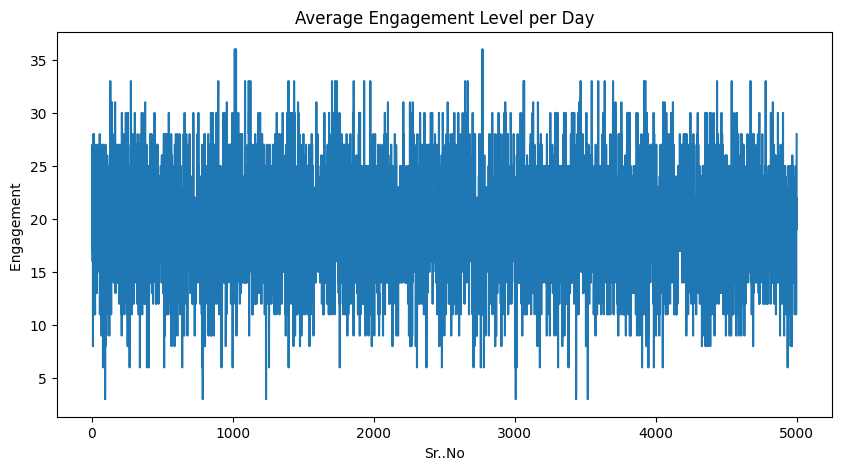

In [16]:
# create a line plot of engagement level average
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('Sr..No')['Engagement '].mean(), markers=True)
plt.title('Average Engagement Level per Day')
plt.xlabel('Sr..No')
plt.ylabel('Engagement ')
plt.show()

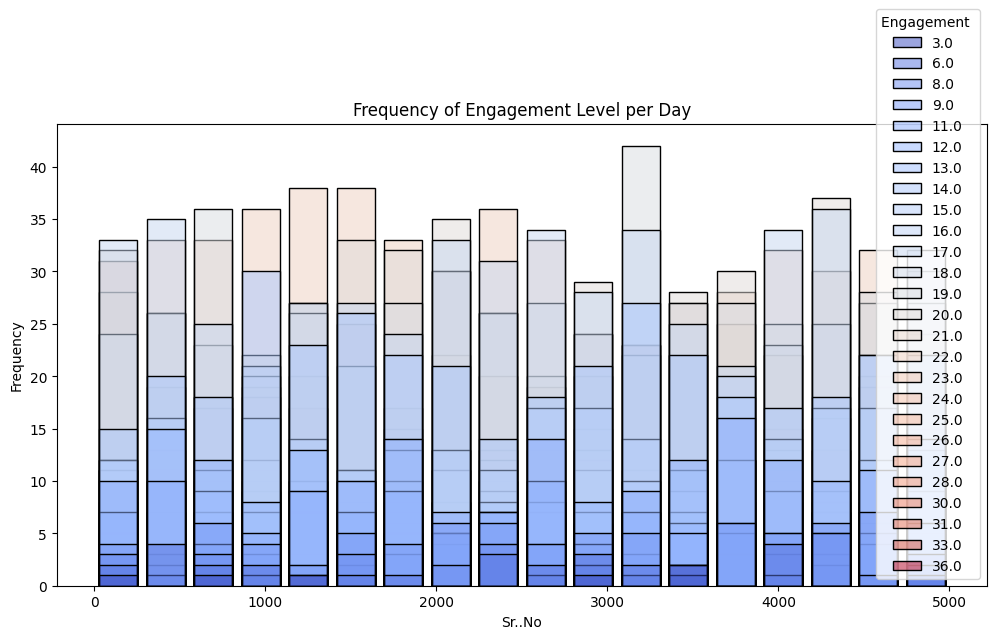

In [17]:
plt.figure(figsize=(12, 6))  # Increase figure size
sns.histplot(data=df, x='Sr..No', hue='Engagement ', palette='coolwarm', shrink=0.8)  # Change color palette and shrink the bars
plt.title('Frequency of Engagement Level per Day')
plt.xlabel('Sr..No')
plt.ylabel('Frequency')
plt.show()

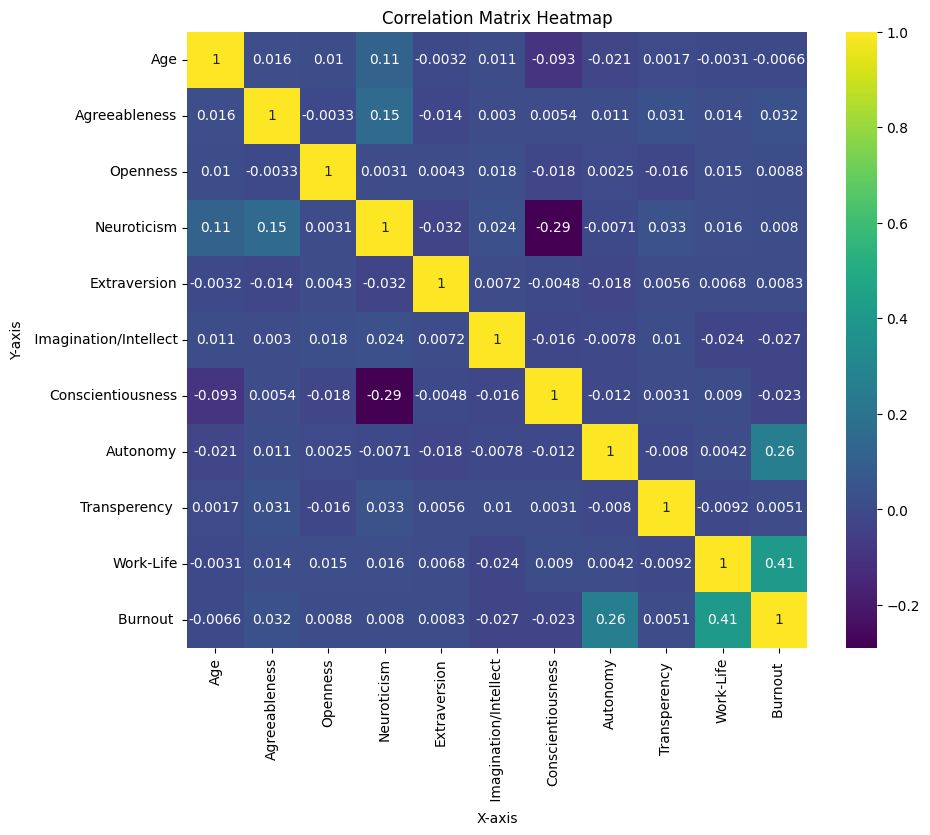

In [18]:
desired_headers = ["Age", "Agreeableness", "Openness","Neuroticism","Extraversion", " Imagination/Intellect", "Conscientiousness", "Autonomy", "Transperency ", "Work-Life", "Burnout "]

# Calculate the correlation matrix for the chosen headers
correlation_matrix = df[desired_headers].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')  # Change color scheme to 'viridis'

# Add a title and labels for the heatmap
plt.title("Correlation Matrix Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

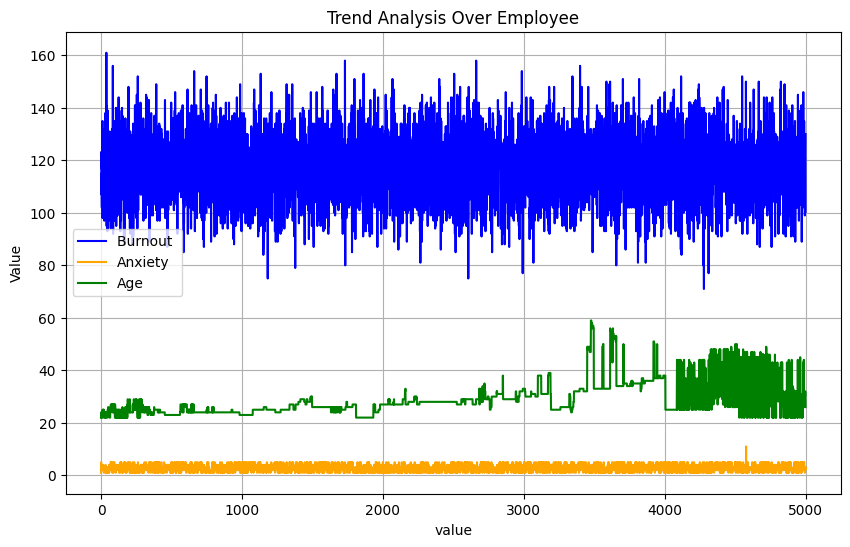

Trend Analysis - Initial Exploration Complete!


In [19]:
features = ['Burnout ', 'Anxiety', 'Age']
sr_col = 'value'

if sr_col in df.columns:
    df_grouped = df.groupby(date_col)[features].mean()
else:
    df_grouped = df[features]

# Adjusting the figure size
plt.figure(figsize=(10, 6))

# Define color palette
colors = ['blue', 'orange', 'green']

for i, col in enumerate(features):
    plt.plot(df_grouped.index, df_grouped[col], color=colors[i], label=col)

plt.xlabel(sr_col)
plt.ylabel("Value")
plt.title("Trend Analysis Over Employee")
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

print("Trend Analysis - Initial Exploration Complete!")

In [22]:
df = df.fillna(df.mean())

features = ['Age', 'Experience', 'Anxiety', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Burnout ']

kmeans = KMeans(n_clusters=3)

kmeans.fit(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

<ipython-input-23-f8b7f662e3ee>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = cluster_labels


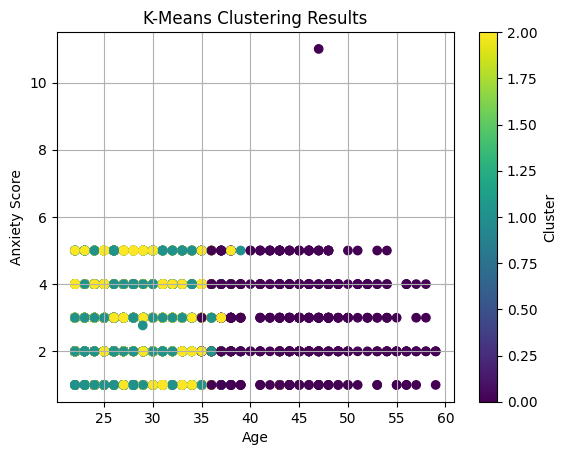

Cluster Centroids:
[[ 44.          22.21106557   2.90368852  11.70491803  12.12090164
   12.80942623 116.54098361]
 [ 27.31713821   5.16153769   2.74340139  11.18945875  11.95625355
   13.28343943 107.13434376]
 [ 27.33968254   5.17006803   2.769161    11.25986395  12.09433107
   13.14965986 127.57641723]]
K-Means Clustering Completed!


In [23]:
cluster_labels = kmeans.labels_

df['cluster'] = cluster_labels

plt.scatter(df['Age'], df['Anxiety'], c=cluster_labels, cmap='viridis')  # Different color for each cluster
plt.xlabel('Age')
plt.ylabel('Anxiety Score')
plt.title('K-Means Clustering Results')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

print("Cluster Centroids:")
print(kmeans.cluster_centers_)

print("K-Means Clustering Completed!")

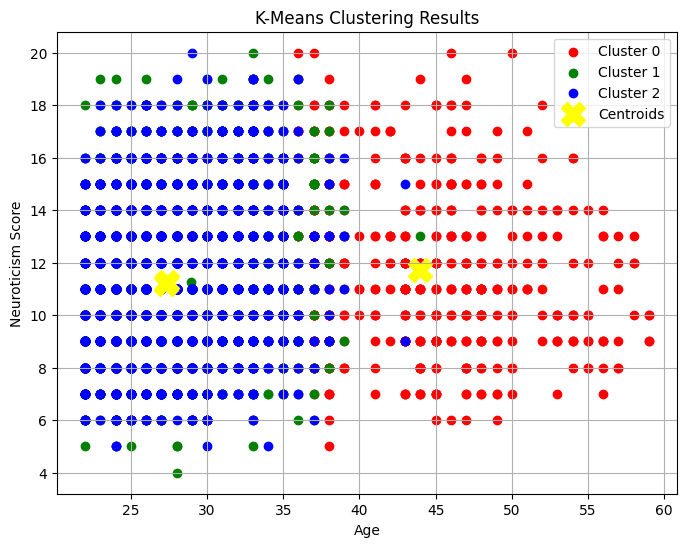

Cluster Centroids:
[[ 44.          22.21106557   2.90368852  11.70491803  12.12090164
   12.80942623 116.54098361]
 [ 27.31713821   5.16153769   2.74340139  11.18945875  11.95625355
   13.28343943 107.13434376]
 [ 27.33968254   5.17006803   2.769161    11.25986395  12.09433107
   13.14965986 127.57641723]]
K-Means Clustering Completed!


In [24]:
cluster_labels = kmeans.labels_

df['cluster'] = cluster_labels

# Define colors for each cluster
colors = ['r', 'g', 'b']

plt.figure(figsize=(8, 6))
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(df[df['cluster'] == i]['Age'], df[df['cluster'] == i]['Neuroticism'], c=colors[i], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='yellow', marker='X', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Neuroticism Score')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

print("Cluster Centroids:")
print(kmeans.cluster_centers_)

print("K-Means Clustering Completed!")

In [25]:
def create_model(look_back=1):
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [28]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)

In [30]:
model = create_model(look_back)
model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=2)

Epoch 1/50
63/63 - 5s - loss: 0.0976 - 5s/epoch - 72ms/step
Epoch 2/50
63/63 - 0s - loss: 0.0173 - 294ms/epoch - 5ms/step
Epoch 3/50
63/63 - 0s - loss: 0.0052 - 295ms/epoch - 5ms/step
Epoch 4/50
63/63 - 0s - loss: 0.0024 - 314ms/epoch - 5ms/step
Epoch 5/50
63/63 - 0s - loss: 0.0023 - 304ms/epoch - 5ms/step
Epoch 6/50
63/63 - 0s - loss: 0.0023 - 305ms/epoch - 5ms/step
Epoch 7/50
63/63 - 0s - loss: 0.0020 - 311ms/epoch - 5ms/step
Epoch 8/50
63/63 - 0s - loss: 0.0019 - 302ms/epoch - 5ms/step
Epoch 9/50
63/63 - 0s - loss: 0.0019 - 302ms/epoch - 5ms/step
Epoch 10/50
63/63 - 0s - loss: 0.0018 - 306ms/epoch - 5ms/step
Epoch 11/50
63/63 - 0s - loss: 0.0016 - 297ms/epoch - 5ms/step
Epoch 12/50
63/63 - 0s - loss: 0.0016 - 302ms/epoch - 5ms/step
Epoch 13/50
63/63 - 0s - loss: 0.0016 - 335ms/epoch - 5ms/step
Epoch 14/50
63/63 - 0s - loss: 0.0015 - 430ms/epoch - 7ms/step
Epoch 15/50
63/63 - 0s - loss: 0.0015 - 419ms/epoch - 7ms/step
Epoch 16/50
63/63 - 0s - loss: 0.0014 - 405ms/epoch - 6ms/step
Epo

In [31]:
testX, testY = create_dataset(test, look_back)
predictions = model.predict(testX)

32/32 [==============================] - 3s 6ms/step


In [33]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' depending on your data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [34]:
# Now fit your model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_predicted = model.predict(X_test_imputed)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_variable = 'Burnout '

features = df.drop(target_variable, axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_predicted = model.predict(X_test_imputed)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

print("Linear Regression Model Created!")

Mean Squared Error (MSE): 3.1839994462702317e-24
R-squared (R^2): 1.0
Linear Regression Model Created!


In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 3.1839994462702317e-24
